In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [54]:
df = pd.read_csv("dataset.csv")
df.drop(columns= ['img_name'], axis=1, inplace= True)
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


Data cleaning and rearranging

Bu işlem, veri kümesindeki etnik gruplar arasındaki dengesizliği gidermek için yapılır. Örnekleme işlemi sayesinde, her etnik gruptan eşit sayıda örnek alınarak daha dengeli bir veri kümesi oluşturulur. Bu da, makine öğrenimi modellerinin eğitilmesi sırasında sınıf dengesizliğinden kaynaklanan yanlılıkları azaltır.

<Axes: >

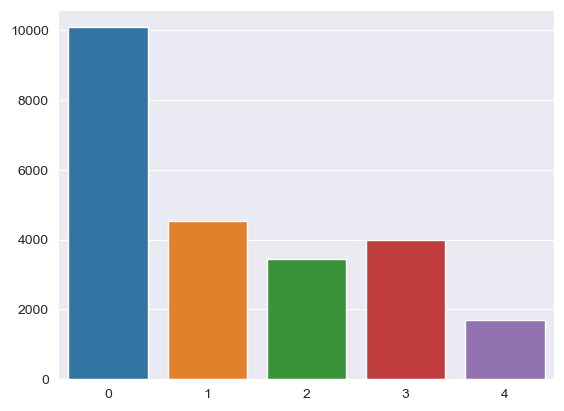

In [45]:
sns.barplot(y=list(df['ethnicity'].value_counts().values),x= list(df['ethnicity'].value_counts().index))

In [46]:
df.shape

(23705, 4)

Mean of all ethnicity counts: 4741.0
Before sampling: 3434
Before sampling: 3975
Before sampling: 1692
Before sampling: 10078
Before sampling: 4526


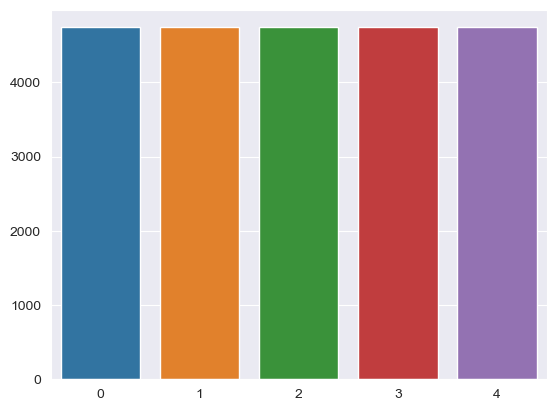

In [47]:
# Find the average of all ethnicity counts
m = df.groupby('ethnicity').count().mean().values[0]
print("Mean of all ethnicity counts: " + str(m))

ethnicity = list(df.ethnicity.unique())

oversampled = pd.DataFrame()
for n in ethnicity:
    l = len(df[df.ethnicity == n])
    print('Before sampling: ' + str(l))
    
    if l >= m:
        dft = df[df.ethnicity == n].sample(int(m))
        oversampled = pd.concat([oversampled, dft])
    else:
        frac = int(m / l)
        dft = pd.DataFrame()
        for i in range(frac + 1):
            dft = pd.concat([dft, df[df.ethnicity == n]])
            
        dft = dft[dft.ethnicity == n].sample(int(m))
        oversampled = pd.concat([oversampled, dft])

oversampled = oversampled.sample(frac=1).reset_index(drop=True)

sns.barplot(y=list(oversampled['ethnicity'].value_counts().values), x=list(oversampled['ethnicity'].value_counts().index))
plt.show()

In [51]:
oversampled

,age,ethnicity,gender,pixels
0,42,3,0,57 35 31 34 44 74 104 128 137 150 155 160 164 ...
1,37,3,0,15 15 15 15 17 18 19 19 20 20 19 18 20 23 22 1...
2,52,0,0,47 64 80 96 111 106 101 98 99 99 95 95 97 99 1...
3,10,4,0,197 197 115 45 37 41 54 99 160 166 176 179 182...
4,26,2,0,202 139 60 48 27 4 18 94 183 203 207 209 210 2...
...,...,...,...,...
23700,33,1,1,71 71 72 72 72 72 71 71 71 71 71 70 68 67 66 6...
23701,60,3,0,43 43 42 42 73 112 137 130 136 140 135 141 147...
23702,37,2,0,45 47 36 52 54 44 41 35 36 39 72 74 89 118 130...
23703,59,0,0,109 109 106 102 99 96 98 107 114 121 128 133 1...
